# Customer Segmentation Using K-Means Algorithm

## 1. Importing Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

## 2. Loading and Displaying the Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Exploratory Data Analysis (EDA)

### a. Dataset Dimensions

In [3]:
df.shape

(200, 5)

### b. Dataset Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### c. Statistical Summary

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 4. Income Segmentation and Visualization

In [6]:
labels = ["Low", "Average", "Above Average", "High"]
df['Income Segment'] = pd.qcut(df["Annual Income (k$)"], q=4, labels=labels)

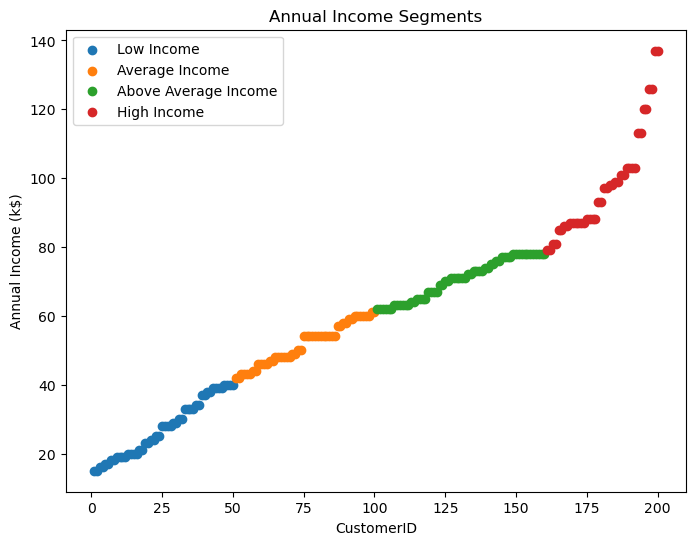

In [7]:
plt.figure(figsize=(8, 6))
for segment in df["Income Segment"].unique():
    segment_data = df[df["Income Segment"] == segment]
    plt.scatter(segment_data["CustomerID"], segment_data["Annual Income (k$)"], label = f"{segment} Income")
plt.xlabel('CustomerID')
plt.ylabel('Annual Income (k$)')
plt.title('Annual Income Segments')
plt.legend()
plt.show()

## 5. Visualizing the Distribution of Annual Income

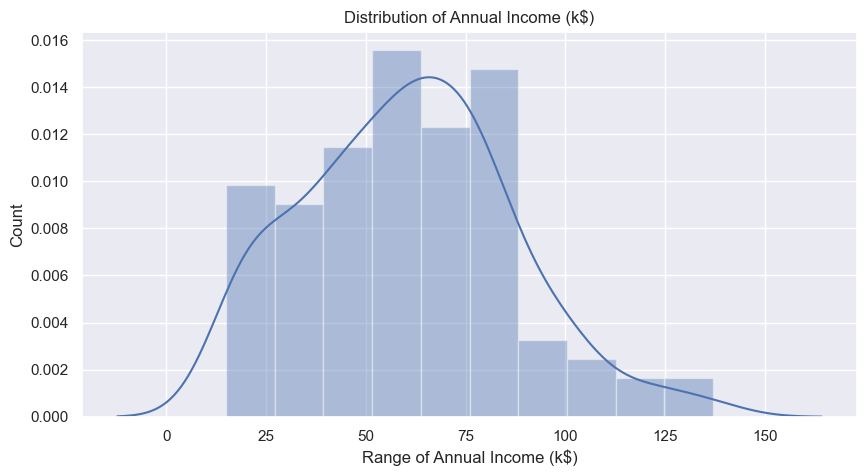

In [8]:
plt.figure(figsize=(10, 5))
sns.set(style = 'darkgrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()

## 6. Spending Score Segmentation and Visualization

In [9]:
labels = ["Low", "Average", "Above Average", "High"]
df['Spending Segment'] = pd.qcut(df["Spending Score (1-100)"], q=4, labels=labels)

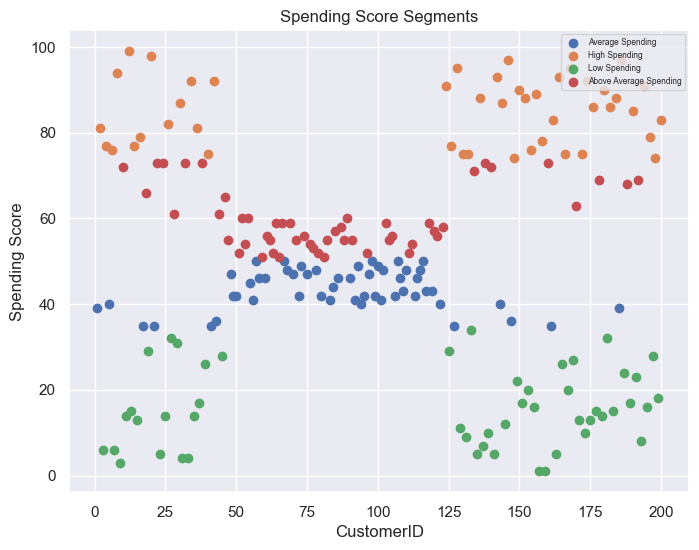

In [10]:
plt.figure(figsize=(8, 6))
for segment in df["Spending Segment"].unique():
    segment_data = df[df["Spending Segment"] == segment]
    plt.scatter(segment_data["CustomerID"], segment_data["Spending Score (1-100)"], label=f"{segment} Spending")

plt.xlabel("CustomerID")
plt.ylabel('Spending Score')
plt.title('Spending Score Segments')
plt.legend(loc="upper right", fontsize=6)
plt.show()

In [11]:
df.drop(['Spending Segment', 'Income Segment'], axis=1, inplace=True)

## 7. Visualizing Data Distribution with Boxplot

<Axes: >

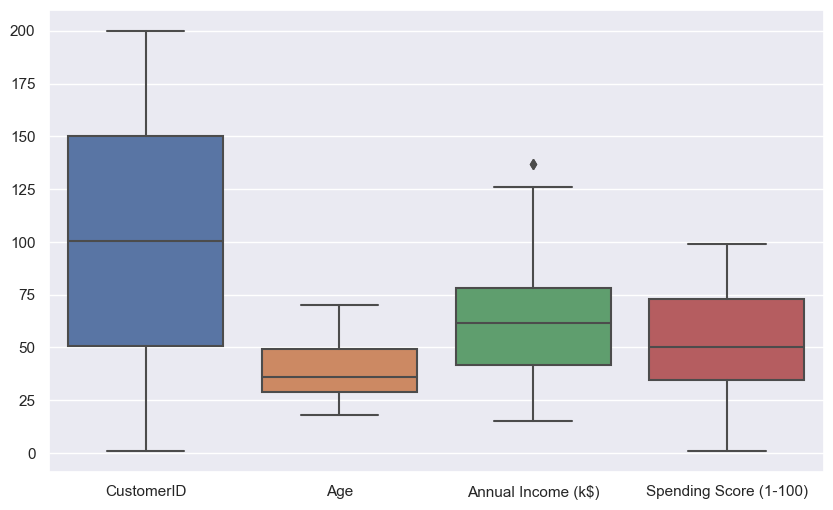

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)

## 8. Distribution of Age

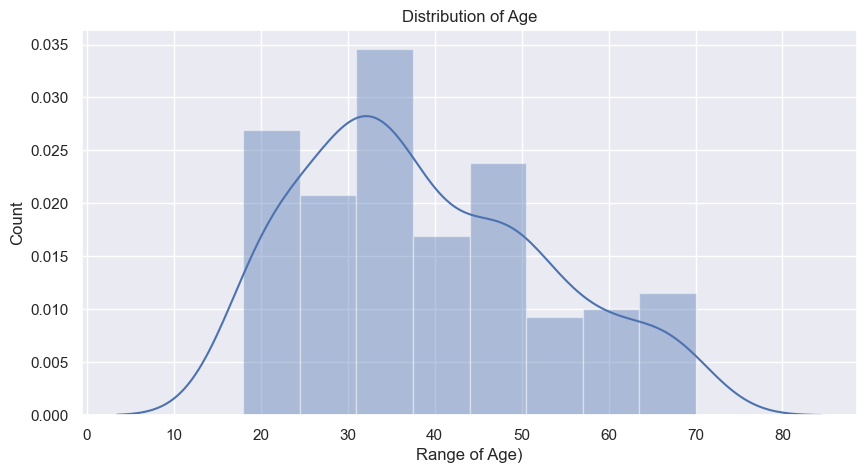

In [13]:
plt.figure(figsize=(10, 5))
sns.set(style = 'darkgrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Range of Age)')
plt.ylabel('Count')
plt.show()

## 9.  Visualizing Gender Distribution

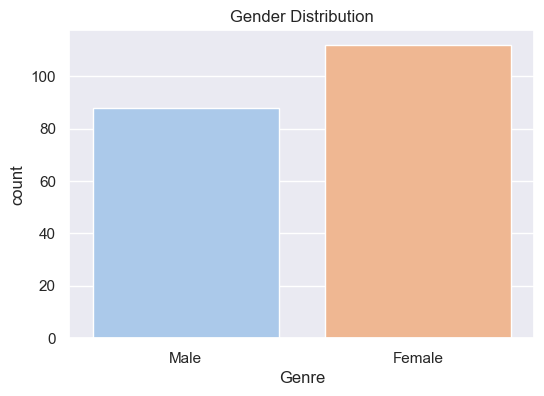

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Genre', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.show()

## 10. Histograms for Numerical Features

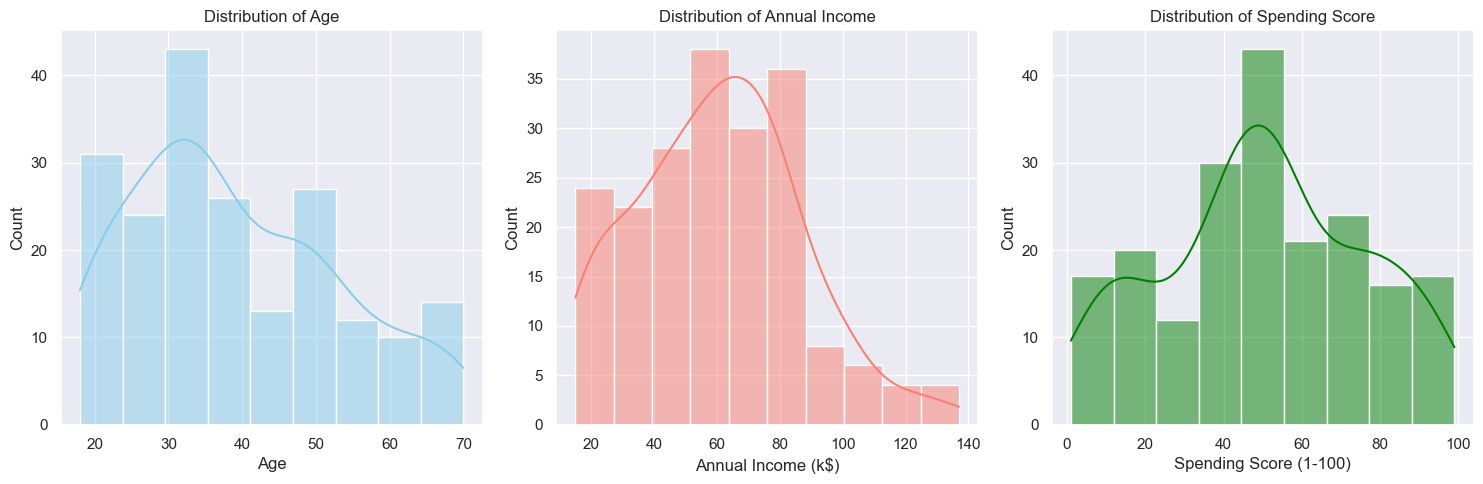

In [15]:
# Histograms for numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, color='salmon')
plt.title('Distribution of Annual Income')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='green')
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()

## 11. Pair Plots

<Figure size 1000x1500 with 0 Axes>

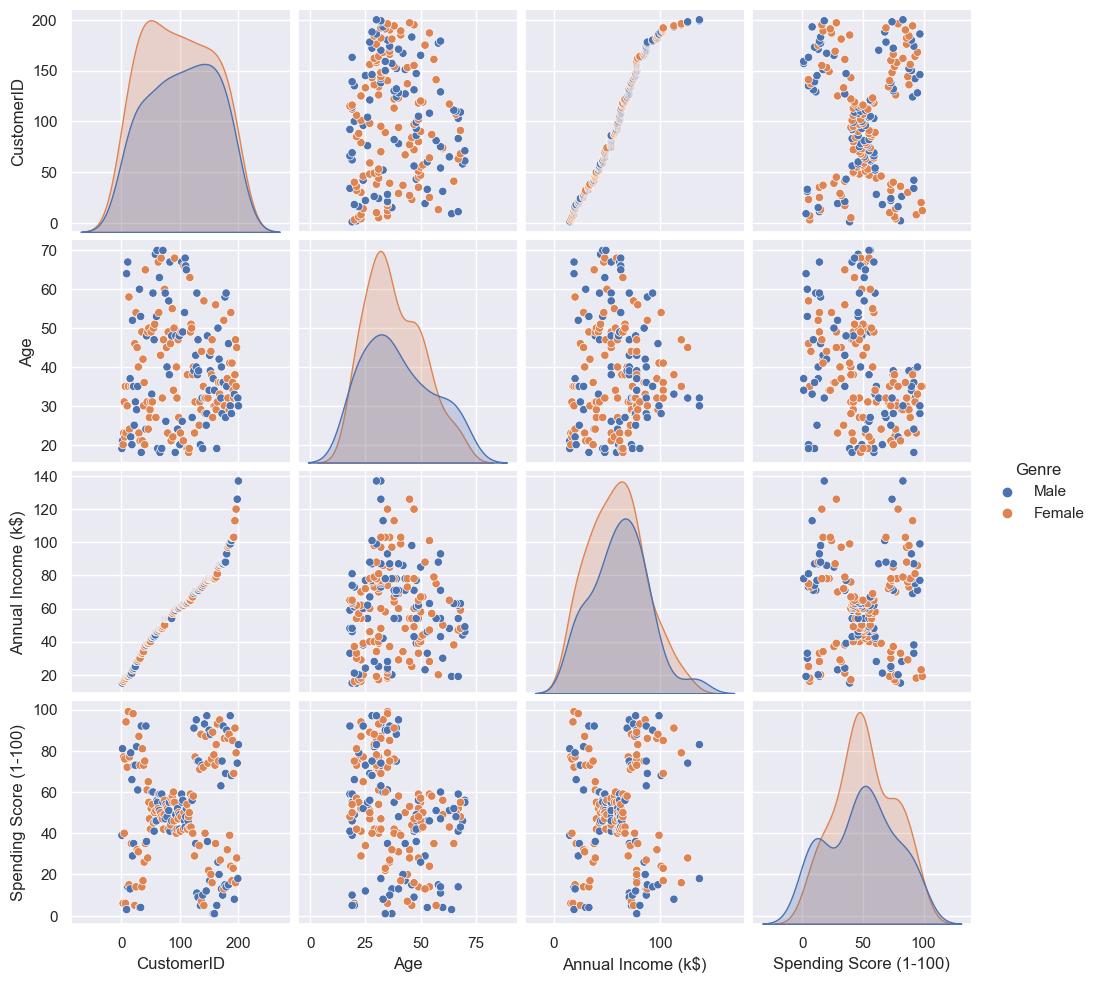

In [16]:
plt.figure(figsize=(10,15))
sns.pairplot(data=df,hue="Genre")
plt.show()

## 12. Scaling Features

In [17]:
## Scaling important Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, 2:])

## 13. Choosing the Number of Clusters

In [18]:
k_choose = np.arange(2, 13)
k_with_inertia = {}
for k in k_choose:
    k_means = KMeans(n_clusters=k, n_init=10)
    k_means.fit(scaled_features)
    k_with_inertia[k] = k_means.inertia_
k_with_inertia

{2: 389.3861889564372,
 3: 295.2122461555488,
 4: 205.22514747675913,
 5: 168.24758017556834,
 6: 133.88887021131023,
 7: 120.43283250037277,
 8: 104.09784107506621,
 9: 93.62875005461927,
 10: 81.68519250054892,
 11: 72.39569823338574,
 12: 67.91890057761087}

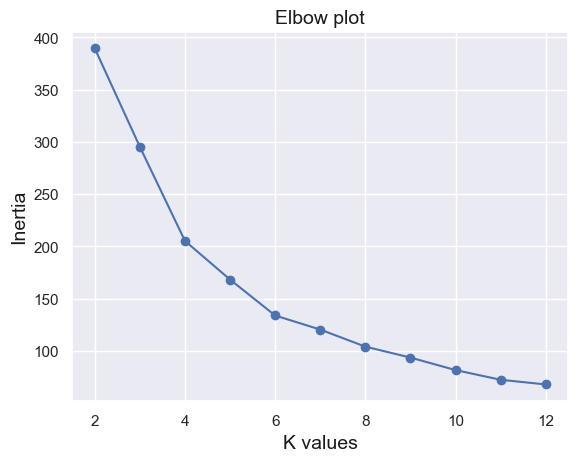

In [19]:
plt.plot(k_with_inertia.keys(), k_with_inertia.values(), "bo-")
plt.title("Elbow plot", fontsize=14, c="k")
plt.xlabel("K values", fontsize=14, c="k")
plt.ylabel("Inertia", fontsize=14, c="k")
plt.show()

##  14. Applying K-Means Clustering

In [20]:
k_means = KMeans(n_clusters=6, n_init=10, random_state=42)
df['cluster'] = k_means.fit_predict(scaled_features)

In [21]:
predictions = k_means.labels_
predictions

array([4, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 0, 4, 5, 1,
       5, 4, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 2, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

### a. Displays the first few rows of the DataFrame, showing the newly added 'cluster' column.

In [22]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5


In [27]:
df["cluster"].value_counts()

0    45
1    39
3    39
2    33
4    23
5    21
Name: cluster, dtype: int64

### b. 3D Scatter Plot of Clusters

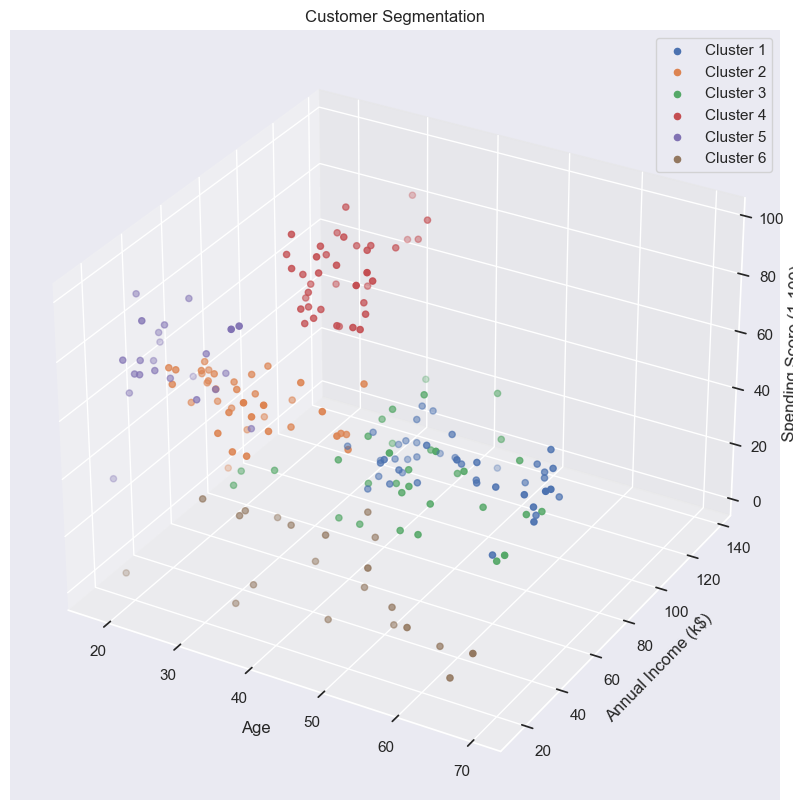

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for i in range(6):
    ax.scatter(df[df['cluster'] == i]['Age'], 
               df[df['cluster'] == i]['Annual Income (k$)'], 
               df[df['cluster'] == i]['Spending Score (1-100)'], 
               label=f'Cluster {i+1}')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Segmentation')

plt.legend()
plt.show()